<a href="https://colab.research.google.com/github/AnshHarjai/twitter_sentiment_anlysis/blob/main/sentiment_analysis_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SECTION 1
## Sentiment analysis on most recent tweets from a particular account

In [ ]:
#sentiment analysis using python.

# Compare prediction accuracy first using api, then using dataset

#twitter api

# api key:
# 5mVhoAqVJeSAXcFWDc499EcsH

# api key secret:
# AZtcXcICRcjrUIho7IFLyyxFJWTcPsjUb6jU4W7NyqLi6EJt7W

# bearer token:
# AAAAAAAAAAAAAAAAAAAAAGhrggEAAAAALFtsz%2FXT758fIuplxL9c6MoKwK8%3DOFlLuOlvceP1UwbjJv7neUiE0YvldaT98lgiJlsfm03BCoTHSj

textBlob database for polarity, subjectivity:
https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml


How textBlob works?
https://planspace.org/20150607-textblob_sentiment/

Pos Tags dictionary:
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html



In [ ]:
import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter API Credentials
consumer_key = '5mVhoAqVJeSAXcFWDc499EcsH'
consumer_secret = 'AZtcXcICRcjrUIho7IFLyyxFJWTcPsjUb6jU4W7NyqLi6EJt7W'
access_token = '1289284659700887552-dwsgLWE6yAvFSZ8kbCF94xsKzk2bVW'
access_token_secret = 'qU9OjRbJFyNz9vGw3B5g7tXicF0nmoQXtcpIjNS1vnvCJ'

In [ ]:
# Authencation using tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Set the access token and access token secret
auth.set_access_token(access_token, access_token_secret)
# Create the API Object
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
# Fetching some posts
posts = api.user_timeline(screen_name='ElonMusk', count=100, lang='en', tweet_mode='extended')
for idx, tweet in enumerate(posts[0:10]):
  print(str(idx) + ') ' + tweet.full_text)

0) @stillgray @axios Much Ado About Nothing
1) @AP But you have piqued my curiosity … who are these “online experts” you speak of?
2) @AP AP is such an expert in misinformation. Twitter couldn’t hope to compete!
3) @ThePrashanthCB @viniciuscfp82 Mars plans are still moving forward
4) @viniciuscfp82 How can it be both illegal and “by the court”? Twitter must abide by the laws of each country or get shut down.
5) Thanksgiving cuisine is such a delightful symphony of flavor! https://t.co/b61TpqqT5s
6) @PleaseBeGneiss 🤣🤣
7) @jordanbpeterson This is simply based on the same list of terms that Twitter has used for some time, so ceteris paribus
8) @amasad 🤣🤣
9) @WSJmarkets WSJ giving foot massages to a criminal


In [ ]:
# Creating a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head(10)

,Tweets
0,@stillgray @axios Much Ado About Nothing
1,@AP But you have piqued my curiosity … who are...
2,@AP AP is such an expert in misinformation. Tw...
3,@ThePrashanthCB @viniciuscfp82 Mars plans are ...
4,@viniciuscfp82 How can it be both illegal and ...
5,Thanksgiving cuisine is such a delightful symp...
6,@PleaseBeGneiss 🤣🤣
7,@jordanbpeterson This is simply based on the s...
8,@amasad 🤣🤣
9,@WSJmarkets WSJ giving foot massages to a crim...


In [ ]:
# Cleaning the tweets
def cleanText(tweet):
  tweet = str(tweet)
  tweet = re.sub(r'(?:\@)\S+', '', tweet) #remove @ mentions
  tweet = re.sub(r'#', '', tweet) #remove # symbols
  tweet = re.sub(r'RT[\s]+', '', tweet) #remove RT - reTweet
  tweet = re.sub(r'https?:\/\/\S+', '', tweet) #remove links
  return tweet

df['Tweets'] = df['Tweets'].apply(cleanText)
df.head(10)


,Tweets
0,Much Ado About Nothing
1,But you have piqued my curiosity … who are th...
2,AP is such an expert in misinformation. Twitt...
3,Mars plans are still moving forward
4,How can it be both illegal and “by the court”...
5,Thanksgiving cuisine is such a delightful symp...
6,🤣🤣
7,This is simply based on the same list of term...
8,🤣🤣
9,WSJ giving foot massages to a criminal


In [ ]:
# Analysing using textBlob on random tweets
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity

df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,Much Ado About Nothing,0.200000,0.200000
1,But you have piqued my curiosity … who are th...,0.000000,0.000000
2,AP is such an expert in misinformation. Twitt...,0.500000,0.000000
3,Mars plans are still moving forward,0.000000,0.000000
4,How can it be both illegal and “by the court”...,0.394444,-0.327778


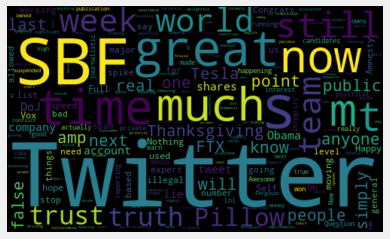

In [ ]:
# Plot the Word Cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300,random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Classification into positive, negative or neutral
def sentiment(polarity):
  if polarity > 0:
    return 'positive'
  elif polarity < 0:
    return 'negative'
  else:
    return 'neutral'

df['Sentiment'] = df['Polarity'].apply(sentiment)
df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,Much Ado About Nothing,0.200000,0.200000,positive
1,But you have piqued my curiosity … who are th...,0.000000,0.000000,neutral
2,AP is such an expert in misinformation. Twitt...,0.500000,0.000000,neutral
3,Mars plans are still moving forward,0.000000,0.000000,neutral
4,How can it be both illegal and “by the court”...,0.394444,-0.327778,negative


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j = j+1


1)   Much Ado About Nothing

2) Thanksgiving cuisine is such a delightful symphony of flavor! 

3)   Amazing 🤩

4)   Jack has a pure heart

5) Happy Thanksgiving! 

Thanks to the Tesla team, owners and fans for helping us accelerate the world’s transition to sustainable…

6) You might notice small, sometimes major, improvements in speed of Twitter. Will be especially significant in countries far away from USA.

7) Tesla Full Self-Driving Beta is now available to anyone in North America who requests it from the car screen, assuming you have bought this option. 

Congrats to Tesla Autopilot/AI team on achieving a major milestone!

8)  That’s the general idea

9)  Great point! ♥️♥️♥️

10)  Fun level on Twitter has definitely increased! I’m having a great time tbh.

11)   It is objectively the case that “conservative” political candidates were more negatively affected than “progressive” candidates.

Anyone using Twitter knows this. Question is simply one of magnitude.

12) Stronger ROI for

In [ ]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j = j+1

1)  How can it be both illegal and “by the court”? Twitter must abide by the laws of each country or get shut down.

2)  WSJ giving foot massages to a criminal

3) I have half a mind to wag my finger at the 1500 accounts that caused the spike, but I shall forebear 🙄

4)  Yeah, these are umm … bad words. I read through the list last week &amp; have to say I learned a few things 😳!!

5) Hate speech impressions down by 1/3 from pre-spike levels. Congrats to Twitter team! 

6)   They need to exist to stop scams, spam, NSFW &amp; illegal stuff from going viral, but they should obviously not be used for political purposes

7)  Agreed, that is not ok

8)  It has been really bad. Far left San Francisco/Berkeley views have been propagated to the world via Twitter. 

I’m sure this comes as no surprise to anyone watching closely.

Twitter is moving rapidly to establish an even playing field. No more thumb on the scale!

9)   It’s not a real publication

10)  🤣🤣 with maybe a little editorial help 

In [ ]:
# Print all of the neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'neutral'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j = j+1

1)  But you have piqued my curiosity … who are these “online experts” you speak of?

2)  AP is such an expert in misinformation. Twitter couldn’t hope to compete!

3)   Mars plans are still moving forward

4)  🤣🤣

5)  This is simply based on the same list of terms that Twitter has used for some time, so ceteris paribus

6)  🤣🤣

7)  Some have simply been abandoned, but vast numbers of handles were consumed by bots/trolls. Aiming to start freeing those up next month.

8) The people have spoken.

Amnesty begins next week.

Vox Populi, Vox Dei.

9)  Removing child exploitation is priority 1. Please reply in comments if you see anything that Twitter needs to address.

10)  Oh we have quite the adventure ahead!

11) Reducing the max allowed tweets/day to a number below what a speed typist on meth could do was helpful

12)   This is necessary to restore public trust

13)  🤣

14)     Working on it

15)  Neil A, which is alien spelled backwards, was first person on the moon, and the year was 69

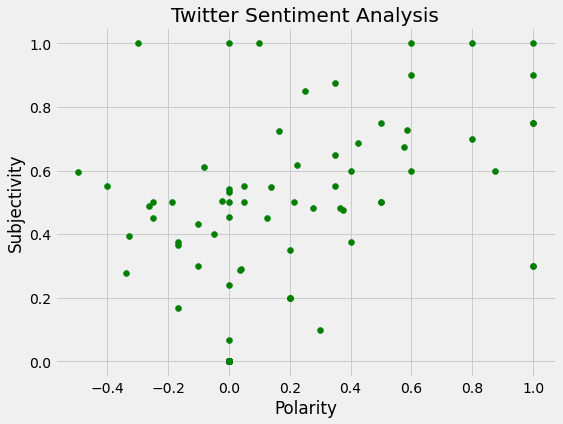

In [ ]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show() 

In [ ]:
# Get the Percentage of Positive Tweets 
ptweets = df[df.Sentiment == 'positive']
ptweets = ptweets['Tweets']
round( (ptweets.shape[0] / df.shape[0]) *100 , 1)

42.4

In [ ]:
# Get the Percentage of Negative Tweets 
ntweets = df[df.Sentiment == 'negative']
ntweets = ntweets['Tweets']
round( (ntweets.shape[0] / df.shape[0]) *100 , 1)

17.2

In [ ]:
# Get the Percentage of Neutral Tweets 
ntweets = df[df.Sentiment == 'neutral']
ntweets = ntweets['Tweets']
round( (ntweets.shape[0] / df.shape[0]) *100 , 1)

40.4

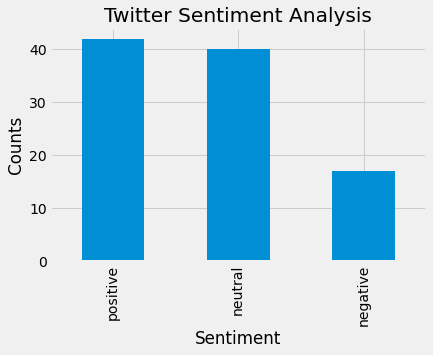

In [ ]:
# Show the Value Counts
df['Sentiment'].value_counts()

#Plot and Visualize the Counts
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

# SECTION 2
## textBlob analysis on sentiment140 dataset

In [ ]:
# read sentiment140 dataset, rename its columns and apply cleanText on tweets
db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv', encoding='latin1')
db.columns = ['target', 'id', 'date', 'query', 'user_id', 'Tweets']
db = db.drop(['id', 'date', 'query', 'user_id'], axis=1)
db['Tweets'] = db['Tweets'].apply(cleanText)
db.head()

,target,Tweets
0,0,is upset that he can't update his Facebook by ...
1,0,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it's not behaving at all. i'm mad. why am..."
4,0,not the whole crew


In [ ]:
#Label encoding
lab_to_sentiment = {0:"negative", 4:"positive"}

def label_decoder(label):
  return lab_to_sentiment[label]

db.target = db.target.apply(lambda x: label_decoder(x))

In [ ]:
def sentiment(polarity):
  if polarity > 0:
    return 'positive'
  else:
    return 'negative'

In [ ]:
# #apply sentiment analysis using textBlob

# db['Polarity'] = db['Tweets'].apply(getPolarity)
# db['Subjectivity'] = db['Tweets'].apply(getSubjectivity)
# db['Sentiment'] = db['Polarity'].apply(sentiment)
# db.head()

,target,Tweets,Polarity,Subjectivity,Sentiment
0,negative,is upset that he can't update his Facebook by ...,0.000,0.0,negative
1,negative,I dived many times for the ball. Managed to s...,0.500,0.5,positive
2,negative,my whole body feels itchy and like its on fire,0.200,0.4,positive
3,negative,"no, it's not behaving at all. i'm mad. why am...",-0.625,1.0,negative
4,negative,not the whole crew,0.200,0.4,positive


In [ ]:
# Prediction accuracy using textBlob on sentiment140 datasets

def compare():
  count = 0
  total = 0
  x = 0
  for val, sent in zip(db['target'], db['Sentiment']):
    if val == sent:
      count += 1
    total += 1

  return "{:.2f}".format((count/total) * 100)

print('Accuracy using textBlob is: ' + str(compare()) + '%')

Accuracy using textBlob is: 62.26%


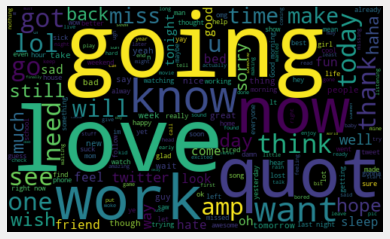

In [ ]:
# Plot the Word Cloud
allWords = ''.join([twts for twts in db['Tweets']])
wordCloud = WordCloud(width = 500, height = 300,random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

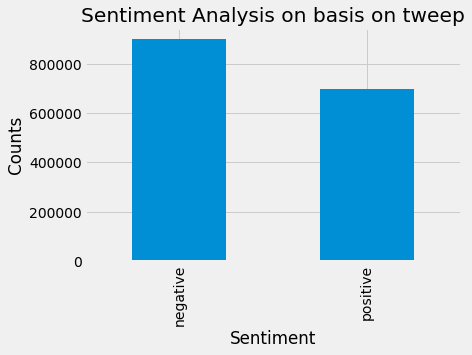

In [ ]:
# Predicted Sentiments

db['Sentiment'].value_counts()

#Plot and Visualize the Counts
plt.title('Sentiment Analysis on basis on tweepy')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
db['Sentiment'].value_counts().plot(kind='bar')
plt.show()

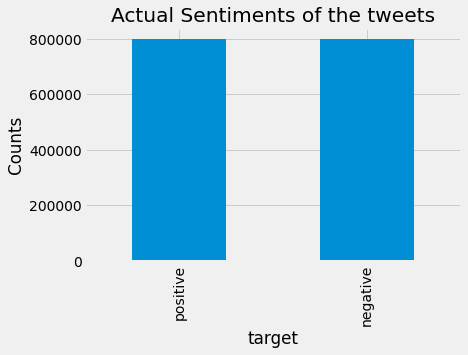

In [ ]:
# Actual Sentiments
db['target'].value_counts()

#Plot and Visualize the Counts
plt.title('Actual Sentiments of the tweets')
plt.xlabel('target')
plt.ylabel('Counts')
db['target'].value_counts().plot(kind='bar')
plt.show()

# Section 3
##Test tweepy on your own tweet

In [ ]:
#Test your own tweet:
test_tweet = str(input("Enter your tweet: "))
clean_text_tweet = cleanText(test_tweet)
polar = getPolarity(test_tweet)
subj = getSubjectivity(test_tweet)
sent = sentiment(polar)
print('Polarity, Subjectivity and Sentiment of \n', test_tweet, ' is \n', polar, subj, sent)

Enter your tweet: Today is not a good day
Polarity, Subjectivity and Sentiment of 
 Today is not a good day  is 
 -0.35 0.6000000000000001 negative
